In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [71]:
F = 7
L = 8

## Excercise 1 -  Generated Quantities Block

In [7]:
gen_quant = CmdStanModel(stan_file='M-02. Intro to STAN/code_1.stan')


10:54:32 - cmdstanpy - INFO - compiling stan file /tmp/tmpt4dzfdcz/tmp1k_1ni7i.stan to exe file /workspace/M-02. Intro to STAN/code_1
10:54:47 - cmdstanpy - INFO - compiled model executable: /workspace/M-02. Intro to STAN/code_1


In [9]:
samples = gen_quant.sample(data={'M':7}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0,
                            adapt_engaged = False, 
                            chains = 1)

10:55:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

10:55:40 - cmdstanpy - INFO - CmdStan done processing.


In [21]:
samples.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,1.0,1.0,1.0,0.0,0.0,273.6200,250.0,282.0,261.0,267.0,275.0,288.0,254.0
1,1.0,2.0,2.0,0.0,0.0,113.4830,105.0,92.0,106.0,122.0,132.0,113.0,126.0
2,1.0,3.0,3.0,0.0,0.0,197.0690,213.0,178.0,204.0,200.0,234.0,190.0,201.0
3,1.0,4.0,4.0,0.0,0.0,63.7975,61.0,71.0,69.0,64.0,62.0,58.0,52.0
4,1.0,5.0,5.0,0.0,0.0,172.1090,175.0,186.0,172.0,161.0,162.0,186.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,996.0,996.0,0.0,0.0,47.6709,43.0,54.0,52.0,47.0,42.0,52.0,45.0
996,1.0,997.0,997.0,0.0,0.0,107.4410,126.0,94.0,95.0,105.0,112.0,97.0,104.0
997,1.0,998.0,998.0,0.0,0.0,28.4626,32.0,27.0,23.0,19.0,36.0,25.0,30.0
998,1.0,999.0,999.0,0.0,0.0,34.5496,25.0,42.0,30.0,40.0,31.0,31.0,31.0


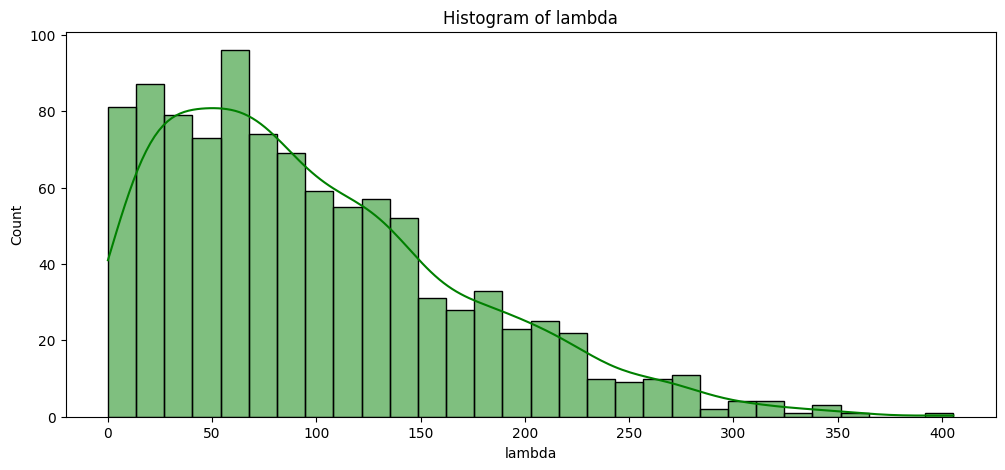

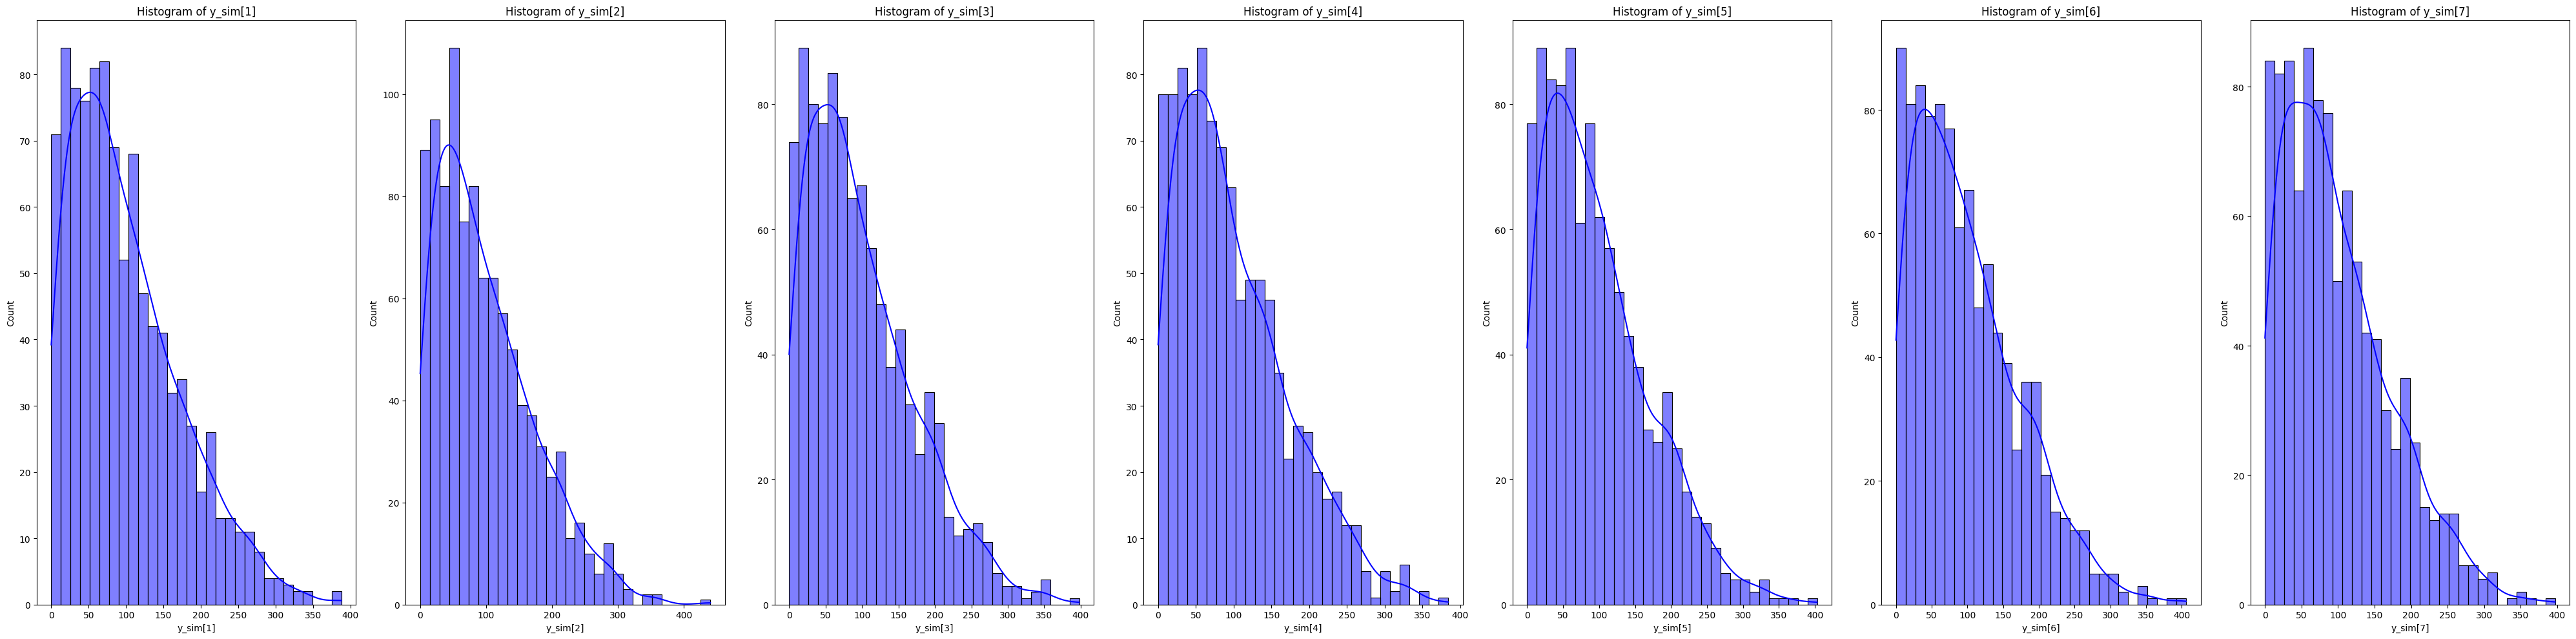

In [43]:
df = samples.draws_pd()

plt.figure(figsize=(12,5))
sns.histplot(df['lambda'], bins=30, kde=True, color='green')
plt.title('Histogram of lambda')

fig, axes = plt.subplots(1, 7, figsize=(40, 10))
for i in range(7):
    sns.histplot(df[f'y_sim[{i+1}]'], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of y_sim[{i+1}]')


plt.tight_layout()
plt.show()

## Excercise 2 - Constraints on the data 

In [58]:
bern1 = CmdStanModel(stan_file='M-02. Intro to STAN/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]}) # changed y from 0 to 1, because o to 2 is not permitted chain

12:10:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:10:20 - cmdstanpy - INFO - CmdStan done processing.


In [60]:
bern2 = CmdStanModel(stan_file='M-02. Intro to STAN/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]}) # changed y from 0 to 1, because o to 2 is not permitted chain

12:10:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:10:29 - cmdstanpy - INFO - CmdStan done processing.


In [ ]:
df_bern1 = samp_bern1.draws_pd()
df_bern2 = samp_bern2.draws_pd()

In [64]:
df_bern1.head(5)

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,1.0,1.0,1.0,-4.35247,1.000000,0.791625,2.0,7.0,0.0,4.42419,0.869503
1,1.0,2.0,2.0,-3.59290,1.000000,0.791625,2.0,3.0,0.0,4.25629,0.790023
2,1.0,3.0,3.0,-2.77578,0.987660,0.791625,1.0,3.0,0.0,3.65209,0.519951
3,1.0,4.0,4.0,-2.78669,0.977896,0.791625,2.0,3.0,0.0,2.91895,0.458087
4,1.0,5.0,5.0,-3.32617,0.884728,0.791625,1.0,3.0,0.0,3.43260,0.254140


In [65]:
df_bern2.head(5)

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,1.0,1.0,1.0,-2.95343,0.974555,0.993458,1.0,3.0,0.0,3.68661,0.647016
1,1.0,2.0,2.0,-2.79630,1.000000,0.993458,2.0,3.0,0.0,2.94602,0.445716
2,1.0,3.0,3.0,-3.05983,0.941429,0.993458,2.0,3.0,0.0,3.14920,0.682882
3,1.0,4.0,4.0,-3.15383,0.973567,0.993458,1.0,1.0,0.0,3.22586,0.708300
4,1.0,5.0,5.0,-2.88288,1.000000,0.993458,1.0,1.0,0.0,3.07929,0.615816


code_2 havent constraints whereas code_3 limiting N to lower=1.

code_3 explicitly declares constraints for y from 0 to 1, which is better approach and escapes from potential numeric calculations problems.

however y has to be defined from 0 to 1 (stan restrictions), so  output should be similar

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [67]:
model_gm1 = CmdStanModel(stan_file='M-02. Intro to STAN/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


12:30:01 - cmdstanpy - INFO - compiling stan file /tmp/tmp29khb4b3/tmp1xxaf3gb.stan to exe file /workspace/M-02. Intro to STAN/code_4
12:30:19 - cmdstanpy - INFO - compiled model executable: /workspace/M-02. Intro to STAN/code_4
12:30:19 - cmdstanpy - INFO - created output directory: /workspace/samples
12:30:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:30:24 - cmdstanpy - INFO - CmdStan done processing.


12:30:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is -1.02689, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -1.78608, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.470662, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.159341, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.946698, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.583674, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.0157175, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exce

"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8442 of 6000 (140.70%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

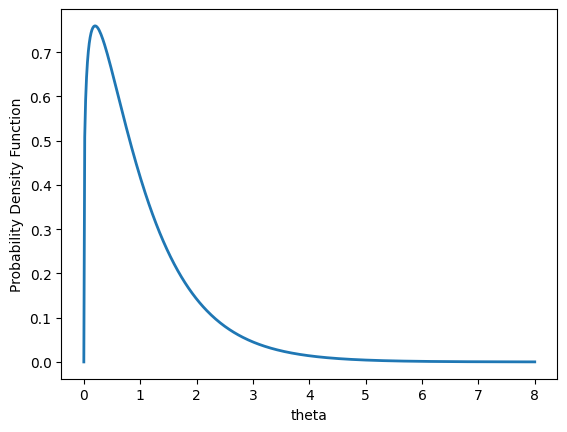

In [68]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [69]:
model_gm2 = CmdStanModel(stan_file='M-02. Intro to STAN/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

12:39:19 - cmdstanpy - INFO - compiling stan file /tmp/tmpjvlzr4fb/tmpbjs2mhrg.stan to exe file /workspace/M-02. Intro to STAN/code_5
12:39:35 - cmdstanpy - INFO - compiled model executable: /workspace/M-02. Intro to STAN/code_5
12:39:35 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:39:39 - cmdstanpy - INFO - CmdStan done processing.
12:39:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code_5.stan', line 6, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


12:39:40 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 6000 (0.03%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

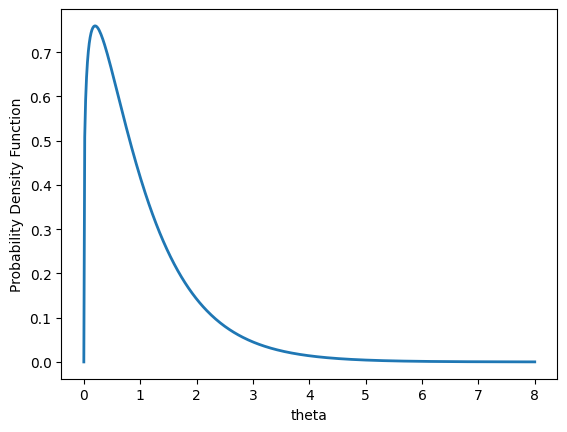

In [70]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

**Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.**

Without constraint on theta, it has negative values, which isn't allowed in gamma distribution - gamma requires only POSITIVE real values

**Verify what changes if constraints are added as in code_5**

In code_5 parameter theta is constrained - can be only a positive value (lower=0). Therefore gamma distribution is more realistic - in case without constraints probs below 0 are not taken under consideration, so gamma dist is less realistic.

## Excercise 4 -  Selection of parameters using equation solving



In [ ]:
model_tune = CmdStanModel(stan_file='M-02. Intro to STAN/code_6.stan')

y0 = 0.1 # initial guess for the equation solving bigger than 0

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, 
                          fixed_param=True, # No sampling, just algebraic solving
                          iter_sampling=1, # single solution
                          iter_warmup=0, 
                          adapt_engaged=False, # ust be false when iter_warmup is 0
                          chains = 1
                          )

# Extract sigma
sigma = tunes.stan_variable('sigma')[0]
print(f"Computed sigma = {sigma:.4f}")

13:55:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

13:55:22 - cmdstanpy - INFO - CmdStan done processing.



Computed sigma = 2.9117


## Excercise 5 - different methods of defining models


In [ ]:
model_samp_st = CmdStanModel(stan_file='M-02. Intro to STAN/code_7.stan')
model_log_target = CmdStanModel(stan_file='M-02. Intro to STAN/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='M-02. Intro to STAN/code_9.stan')
data = {'N': F}
seed = 16082001 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

14:02:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:02:26 - cmdstanpy - INFO - CmdStan done processing.


14:02:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:02:26 - cmdstanpy - INFO - CmdStan done processing.


14:02:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:02:27 - cmdstanpy - INFO - CmdStan done processing.


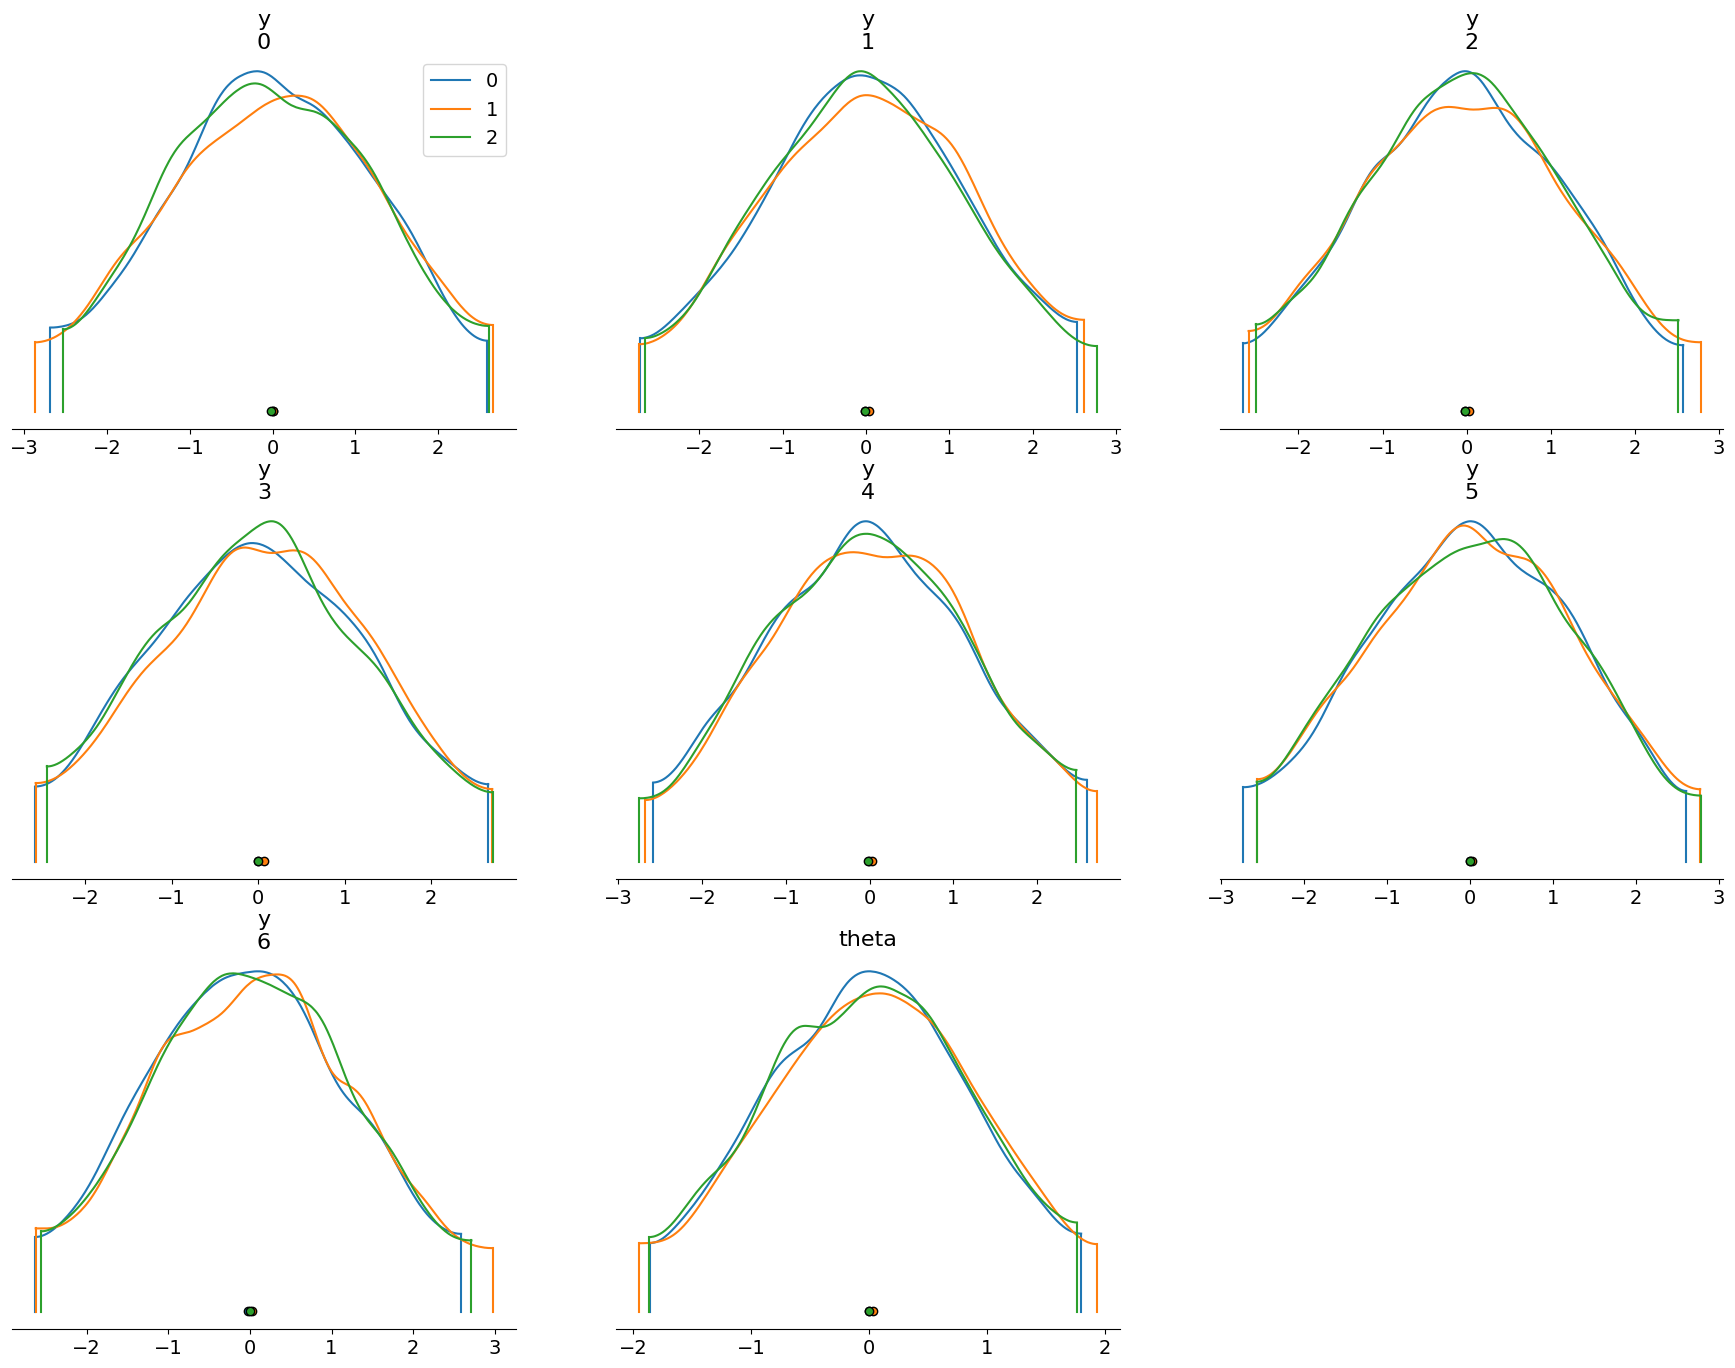

In [93]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [98]:
model_gq = CmdStanModel(stan_file='M-02. Intro to STAN/code_10.stan')

mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)

14:10:59 - cmdstanpy - INFO - compiling stan file /tmp/tmpj8m3fnrj/tmp1f9ngpk2.stan to exe file /workspace/M-02. Intro to STAN/code_10
14:11:17 - cmdstanpy - INFO - compiled model executable: /workspace/M-02. Intro to STAN/code_10
14:11:17 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
14:11:17 - cmdstanpy - INFO - Chain [1] start processing
14:11:17 - cmdstanpy - INFO - Chain [2] start processing
14:11:17 - cmdstanpy - INFO - Chain [3] start processing
14:11:17 - cmdstanpy - INFO - Chain [4] start processing
14:11:17 - cmdstanpy - INFO - Chain [1] done processing
14:11:17 - cmdstanpy - INFO - Chain [4] done processing
14:11:17 - cmdstanpy - INFO - Chain [2] done processing
14:11:17 - cmdstanpy - INFO - Chain [3] done processing


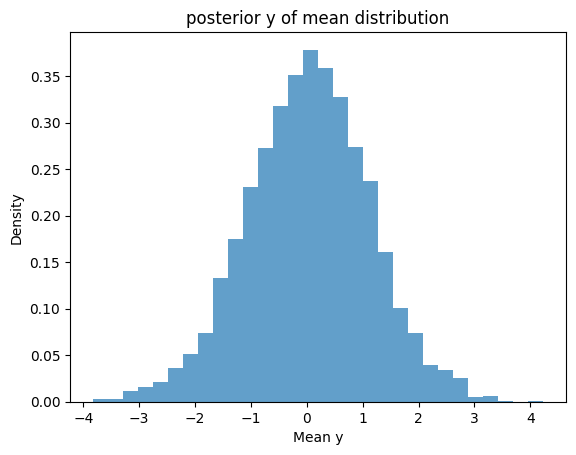

In [99]:
mean_y_samples = mean_of_y.stan_variable('mean_y')
plt.hist(mean_y_samples, bins=30, density=True, alpha=0.7)
plt.title('posterior y of mean distribution')
plt.xlabel('Mean y')
plt.ylabel('Density')
plt.show()
